This is a short project where I will use Monte Carlo (MC) methods to estimate the area of a circle..

Monte Carlo techniques have frquently appeared in the reading I've done for and around my degree, but at present I do not fully understand how they work. The aim of this project is to appreciate the inner workings of MC methods by coding a simple example.

### Problem setup:
- Create a circle and a square, both centered at the origin. The side length of the square is equal to the diameter of the circle.
- Randomly place a user-defined number of points (n) inside the square.
- Keep track of how may points fall inside/outside the circle.
- Estimate circle's area by multiplying: "the fraction of points that fall inside the circle" by "the area of the square".

## 1. The imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 2. Creating the circle and the square

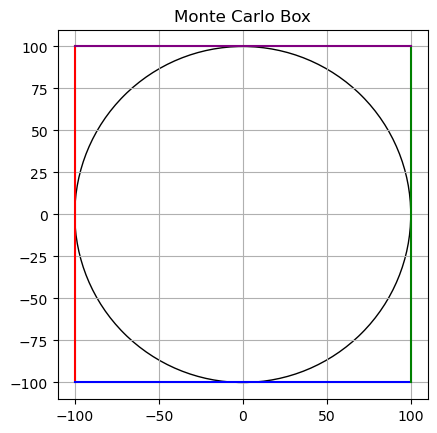

In [2]:
# This cell will create the square box and circle on a grid

# the circle

figure, axes = plt.subplots()
Drawing_uncolored_circle = plt.Circle( (0, 0), 100 , fill = False )
 
axes.set_aspect(1)
axes.add_artist( Drawing_uncolored_circle )

# the square

a = plt.plot([-100, -100], [-100, 100], color='red')
b = plt.plot([100, -100], [-100, -100], color = 'blue')
b = plt.plot([100, 100], [100, -100], color = 'green')
d = plt.plot([-100, 100], [100, 100], color = 'purple')

plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.title( 'Monte Carlo Box' )
plt.grid()
plt.show()

## 3. Determining whether or not the point in question lies inside the circle

In [3]:
def inside_circle_or_not(x, y):
    '''Determines whether a given point is inside the circle'''
    
    c = np.sqrt(x**2 + y**2)
    
    if c <= 100:
        return True
    return False

## 4. Creating the points (and checking whether they're in the circle using 3)

In [4]:
def point_creator_and_circle_checker(n):
    '''Creates n random points, plots them, and keeps track of how many points are in the circle
    Also predicts cicrcle area and compares prediction to true area, giving the percentage error'''
    
    # plotting the points and checking whether they're in the circle
    counter_list = []
    inside_circle = []
    while len(counter_list) < n:
        x = random.randint(-100,100)
        y = random.randint(-100,100)
        plt.plot(x, y, marker="o", markersize=1, markeredgecolor="red", markerfacecolor="red")
        counter_list.append(1)
        if inside_circle_or_not(x, y) == True:
            inside_circle.append(1)
    
    plt.xlim(-110, 110)
    plt.ylim(-110, 110)
    plt.title( "Monte Carlo diagram")
    plt.grid()
    plt.show()
    
    # Caclualting precentage error between predicted area and true area
    pred_circle_area = ((len(inside_circle))/len(counter_list)*(200*200))
    real_circle_area = np.pi*(100**2)
    percent_error = ((abs(pred_circle_area - real_circle_area)) / real_circle_area)*100
    
    rounded_pred_circle_area = round(pred_circle_area)
    rounded_percent_error = round(percent_error)
    
    print("Predicted area of circle, when {} points are sampled = {} units²".format(n, rounded_pred_circle_area))
    
    print("Percentage error from true area = {} % (nearest percent)".format(rounded_percent_error))

## 5. Putting everything together and creating the interactive part

Please input the number of points (<5,000) to be sampled here: 4999


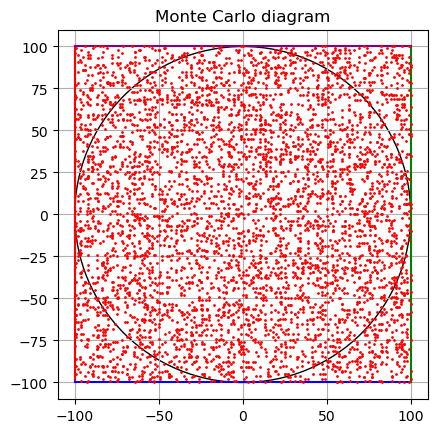

Predicted area of circle, when 4999 points are sampled = 31470 units²
Percentage error from true area = 0 % (nearest percent)


In [5]:
Num_points_sampled = input('Please input the number of points (<5,000) to be sampled here: ')

int1 = int(Num_points_sampled)

figure, axes = plt.subplots()
Drawing_uncolored_circle = plt.Circle( (0, 0), 100 , fill = False )
 
axes.set_aspect(1)
axes.add_artist( Drawing_uncolored_circle )

a = plt.plot([-100, -100], [-100, 100], color='red')
b = plt.plot([100, -100], [-100, -100], color = 'blue')
b = plt.plot([100, 100], [100, -100], color = 'green')
d = plt.plot([-100, 100], [100, 100], color = 'purple')

point_creator_and_circle_checker(int1)

# The work above is from early spring of 2023, below is a slightly more streamlined version I made in the summer of 2024 when I had more coding experience. It has been added in case the reader is interested in a more concise version of the project

Please input the number of points (<5,000) to be sampled here: 2500


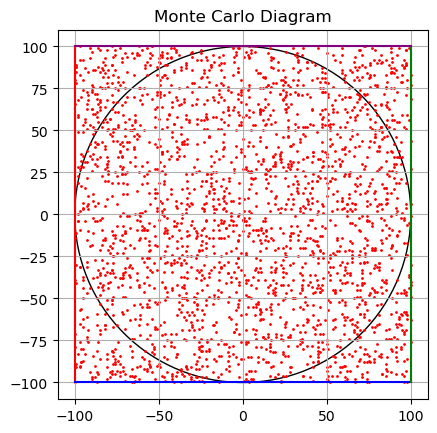

Predicted area with 2500 samples: 30832 unit²
Percentage error from true area: 2%


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import random

# From step 2: Creating the circle and the square
def create_circle_and_square(ax):
    """Draws a bounding square and a circle centered at the origin."""
    circle = plt.Circle((0, 0), 100, fill=False)
    ax.set_aspect('equal')
    ax.add_artist(circle)

    # Draw square sides
    ax.plot([-100, -100], [-100, 100], color='red')     # Left edge
    ax.plot([-100, 100], [-100, -100], color='blue')    # Bottom edge
    ax.plot([100, 100], [-100, 100], color='green')     # Right edge
    ax.plot([-100, 100], [100, 100], color='purple')    # Top edge

    ax.set_xlim(-110, 110)
    ax.set_ylim(-110, 110)
    ax.grid(True)
    ax.set_title('Monte Carlo Box')

# From step 3: Checking whether the point lies inside the circle
def is_inside_circle(x, y, radius=100):
    """Returns True if the point (x, y) is within the circle of given radius."""
    return x**2 + y**2 <= radius**2

# From steps 4 & 5: Running a MC simulation in the circle/square setup to estimate the circle's area
def monte_carlo_simulation(n_points, show_plot=True):
    """Performs Monte Carlo simulation to estimate the area of a circle."""
    inside = 0
    xs, ys = [], []

    for _ in range(n_points):
        x, y = random.randint(-100, 100), random.randint(-100, 100)
        xs.append(x)
        ys.append(y)
        if is_inside_circle(x, y):
            inside += 1

    if show_plot:
        fig, ax = plt.subplots()
        create_circle_and_square(ax)
        ax.scatter(xs, ys, color='red', s=1)
        ax.set_title("Monte Carlo Diagram")
        plt.show()

    # Caclualting precentage error between predicted area and true area
    estimated_area = (inside / n_points) * (200 ** 2)
    true_area = np.pi * (100 ** 2)
    error_percent = abs(estimated_area - true_area) / true_area * 100

    print(f"Predicted area with {n_points} samples: {round(estimated_area)} unit\u00b2")
    print(f"Percentage error from true area: {round(error_percent)}%")

# From step 5: Putting everything together
def main():
    try:
        n = int(input("Please input the number of points (<5,000) to be sampled here: "))
        if n <= 0:
            print("Please enter a positive integer.")
            return
        monte_carlo_simulation(n)
    except ValueError:
        print("Invalid input. Please enter an integer.")

if __name__ == "__main__":
    main()